In [1]:
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_excel("BBVA.xlsx")

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['año'] = df['Fecha'].dt.year
df['dia'] = df['Fecha'].dt.day_name()
df['mes'] = df['Fecha'].dt.month_name()
df.head()

,Fecha valor,Fecha,Concepto,Movimiento,Importe,Divisa,Disponible,Gasto,Categoria,año,dia,mes
0,10/01/2026,2026-01-12,673 GADIS LA PALLOZA A CORU#A ES,PAGO CON TARJETA,-2.00,EUR,1573.73,Hogar,Supermercado,2026,Monday,January
1,10/01/2026,2026-01-12,673 GADIS LA PALLOZA A CORU#A ES,PAGO CON TARJETA,-2.00,EUR,1575.73,Hogar,Supermercado,2026,Monday,January
2,10/01/2026,2026-01-12,673 GADIS LA PALLOZA A CORU#A ES,PAGO CON TARJETA,-18.23,EUR,1577.73,Hogar,Supermercado,2026,Monday,January
3,10/01/2026,2026-01-12,673 GADIS LA PALLOZA A CORU#A ES,PAGO CON TARJETA,-110.47,EUR,1595.96,Hogar,Supermercado,2026,Monday,January
4,09/01/2026,2026-01-09,GRUPO OPTICO MARINEDA LA CORUNA ES,PAGO CON TARJETA,-98.72,EUR,1706.43,Varios,Cris,2026,Friday,January


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha valor  35 non-null     object        
 1   Fecha        35 non-null     datetime64[ns]
 2   Concepto     35 non-null     object        
 3   Movimiento   35 non-null     object        
 4   Importe      35 non-null     float64       
 5   Divisa       35 non-null     object        
 6   Disponible   35 non-null     float64       
 7   Gasto        35 non-null     object        
 8   Categoria    35 non-null     object        
 9   año          35 non-null     int32         
 10  dia          35 non-null     object        
 11  mes          35 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(8)
memory usage: 3.3+ KB


In [5]:
df.describe()

,Fecha,Importe,Disponible,año
count,35,35.000000,35.000000,35.0
mean,2026-01-08 21:56:34.285714176,-22.974857,1671.055714,2026.0
min,2026-01-02 00:00:00,-820.000000,1311.530000,2026.0
25%,2026-01-03 12:00:00,-71.955000,1414.365000,2026.0
50%,2026-01-09 00:00:00,-16.990000,1570.730000,2026.0
75%,2026-01-12 00:00:00,-1.440000,1822.510000,2026.0
max,2026-01-16 00:00:00,1000.000000,3168.160000,2026.0
std,NaN,279.414880,394.659271,0.0


In [6]:
df['Importe'] = df['Importe'].abs()

In [7]:
df['Gasto'].value_counts()

Gasto
Hogar      12
Coche      10
Varios      5
Niñas       4
Ingreso     4
Name: count, dtype: int64

In [8]:
df.to_csv('bbva.csv', index=False)

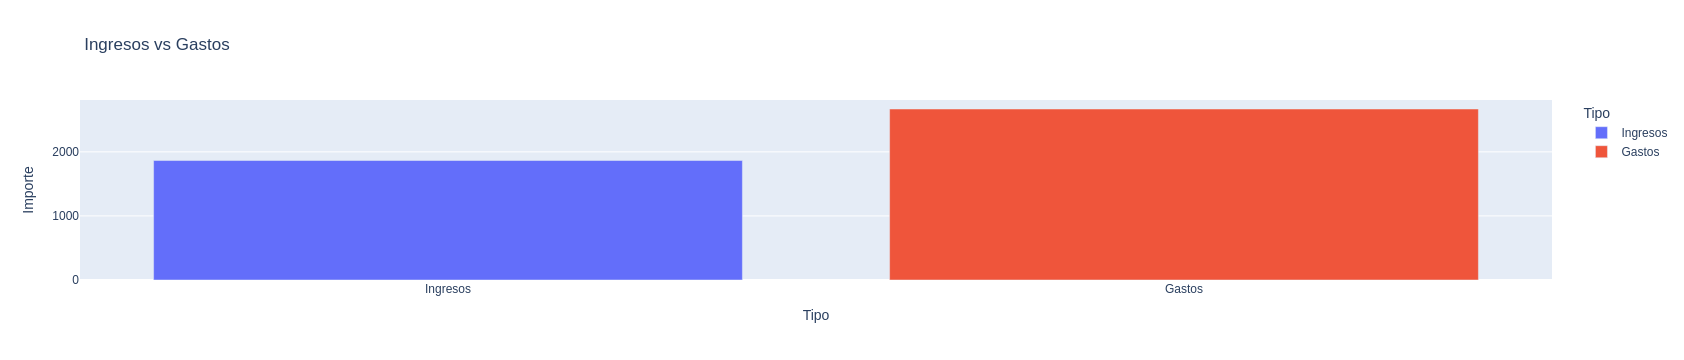

In [11]:
ingresos = df.loc[df['Gasto'] == "Ingreso", 'Importe'].sum()
categorias_gastos = ["Hogar", "Niñas", "Coche", "Varios"]
gastos = df.loc[df['Gasto'].isin(categorias_gastos), 'Importe'].sum()

resumen = pd.DataFrame({
    'Tipo': ['Ingresos', 'Gastos'],
    'Importe': [ingresos, gastos]
})

fig1 = px.bar(
    resumen,
    x='Tipo',
    y='Importe',
    color="Tipo",
    title='Ingresos vs Gastos'
)

fig1.show()

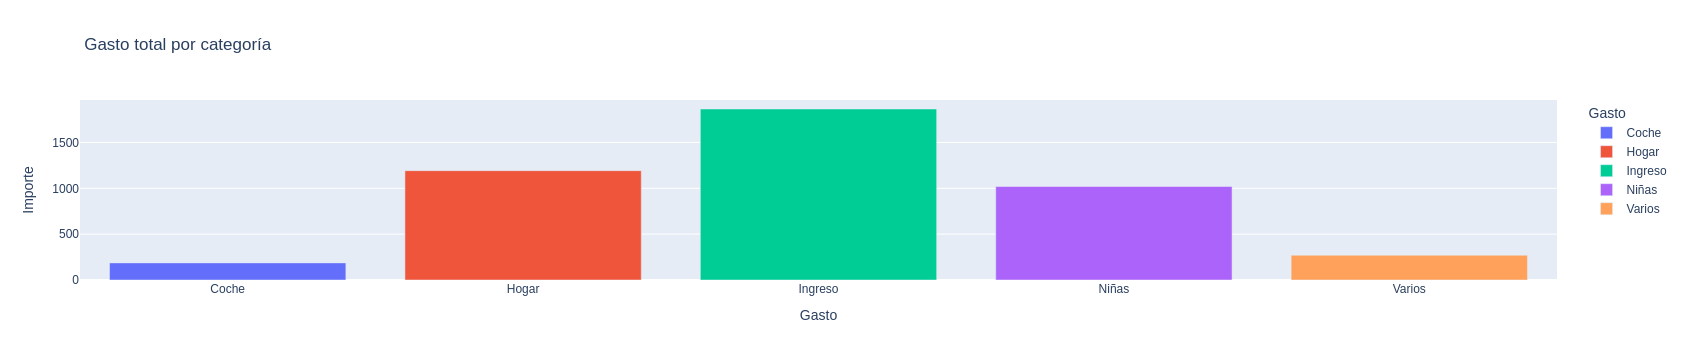

In [12]:
df_gasto = (df.groupby("Gasto", as_index=False)["Importe"].sum())

fig2 = px.bar(
    df_gasto,
    x="Gasto",
    y="Importe",
    color="Gasto",   # color distinto por categoría
    title="Gasto total por categoría"
)

fig2.show()

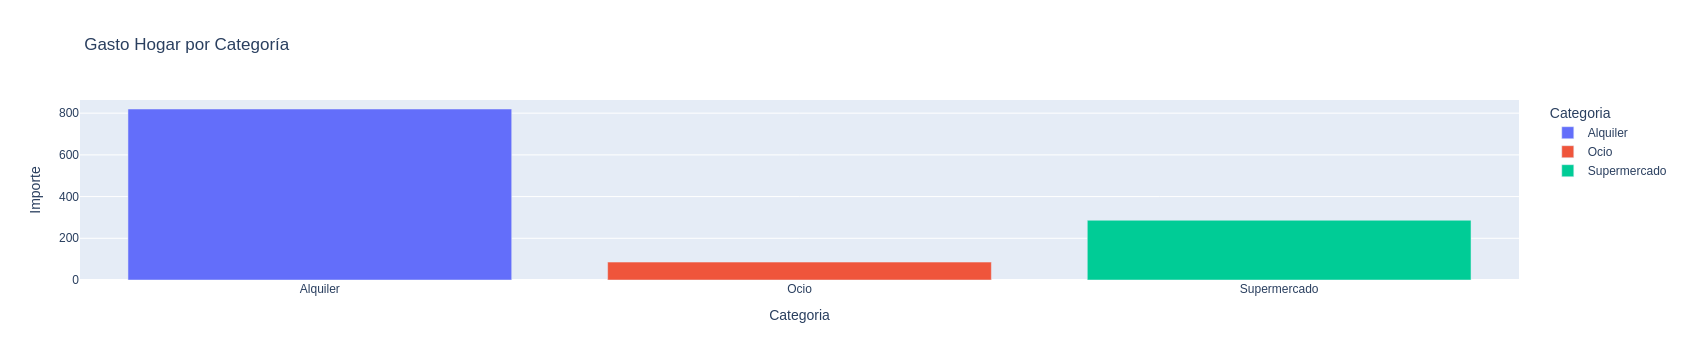

In [13]:
df_hogar = (
    df[df["Gasto"] == "Hogar"]
    .groupby("Categoria", as_index=False)["Importe"]
    .sum()
)

fig3 = px.bar(
    df_hogar,
    x="Categoria",
    y="Importe",
    color="Categoria",
    title="Gasto Hogar por Categoría"
)
fig3.show()


In [ ]:
df_niñas = (df[df["Gasto"] == "Niñas"].groupby("Categoria", as_index=False)["Importe"].sum())
fig4 = px.bar(df_niñas,x="Categoria",y="Importe",color="Categoria",title="Gasto Niñas por Categoría")

fig4.show()

In [ ]:
df_coche = (df[df["Gasto"] == "Coche"].groupby("Categoria", as_index=False)["Importe"].sum())
fig5 = px.bar(df_coche,x="Categoria",y="Importe",color="Categoria",title="Gasto coche por Categoría")

fig5.show()

In [ ]:
df_varios = (df[df["Gasto"] == "Varios"].groupby("Categoria", as_index=False)["Importe"].sum())
fig6 = px.bar(df_varios,x="Categoria",y="Importe",color="Categoria",title="Gasto coche por Categoría")

fig6.show()